In [ ]:
# ==========================================================================
# CELL 1: INSTALL LIBRARIES AND MOUNT GOOGLE DRIVE
# ==========================================================================
"""
Install all required libraries for:
- YOLOv8 training and inference on ADD 256 dataset
- Data handling and conversion (circle to bbox)
- Visualization and analysis
- GPU acceleration
"""

# Install ultralytics (YOLOv8)
!pip install -q ultralytics

# Install additional required libraries
!pip install -q opencv-python pillow numpy pandas matplotlib seaborn
!pip install -q torch torchvision torchaudio
!pip install -q tqdm requests scikit-learn
!pip install -q requests-download  # For downloading ADD 256

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

print("✓ All libraries installed successfully!")
print("✓ Google Drive mounted successfully!")

# Verify GPU availability
import torch
print(f"\n✓ GPU Available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"  GPU Name: {torch.cuda.get_device_name(0)}")
    print(f"  GPU Memory: {torch.cuda.get_device_properties(0).total_memory / 1e9:.2f} GB")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 28.2 MB/s eta 0:00:00
Mounted at /content/drive
✓ All libraries installed successfully!
✓ Google Drive mounted successfully!

✓ GPU Available: True
  GPU Name: Tesla T4
  GPU Memory: 15.83 GB


In [ ]:
# ==========================================================================
# CELL 2: CREATE DIRECTORY STRUCTURE FOR ADD 256 DATASET
# ==========================================================================
"""
Create organized folder structure in Google Drive to store:
1. ADD 256 raw dataset (downloaded)
2. Processed dataset in YOLO format
3. Fine-tuned models
4. Fine-tuning results and metrics
5. Visualizations (bounding boxes, predictions)
"""

import os
from pathlib import Path

# Define base directories
base_drive = '/content/drive/My Drive'

# Create main project directory for ADD 256
project_dir = Path(base_drive) / 'YOLO_ADD256_Finetuning'
project_dir.mkdir(exist_ok=True)

# Create subdirectories
dataset_raw_dir = project_dir / 'ADD256_Raw'
dataset_processed_dir = project_dir / 'ADD256_YOLO_Format'
models_dir = project_dir / 'Models'
results_dir = project_dir / 'Results/YOLOv11'
runs_dir = project_dir / 'Training_Runs'
visualizations_dir = project_dir / 'Visualizations'

# Create all directories
for directory in [dataset_raw_dir, dataset_processed_dir, models_dir,
                  results_dir, runs_dir, visualizations_dir]:
    directory.mkdir(parents=True, exist_ok=True)
    print(f"✓ Created: {directory}")

# Display directory structure
print("\n" + "="*80)
print("DIRECTORY STRUCTURE CREATED:")
print("="*80)
print(f"""
{project_dir.name}/
├── ADD256_Raw/ (Raw dataset - will be downloaded here)
├── ADD256_YOLO_Format/ (Processed dataset in YOLO format)
│   ├── images/
│   │   ├── train/
│   │   └── val/
│   └── labels/
│       ├── train/
│       └── val/
├── Models/ (Fine-tuned model weights)
├── Results/ (Metrics and analysis)
├── Training_Runs/ (Training logs)
└── Visualizations/ (Dataset & Prediction visualizations)
""")

print(f"Project root: {project_dir}")


✓ Created: /content/drive/My Drive/YOLO_ADD256_Finetuning/ADD256_Raw
✓ Created: /content/drive/My Drive/YOLO_ADD256_Finetuning/ADD256_YOLO_Format
✓ Created: /content/drive/My Drive/YOLO_ADD256_Finetuning/Models
✓ Created: /content/drive/My Drive/YOLO_ADD256_Finetuning/Results/YOLOv11
✓ Created: /content/drive/My Drive/YOLO_ADD256_Finetuning/Training_Runs
✓ Created: /content/drive/My Drive/YOLO_ADD256_Finetuning/Visualizations

DIRECTORY STRUCTURE CREATED:

YOLO_ADD256_Finetuning/
├── ADD256_Raw/ (Raw dataset - will be downloaded here)
├── ADD256_YOLO_Format/ (Processed dataset in YOLO format)
│   ├── images/
│   │   ├── train/
│   │   └── val/
│   └── labels/
│       ├── train/
│       └── val/
├── Models/ (Fine-tuned model weights)
├── Results/ (Metrics and analysis)
├── Training_Runs/ (Training logs)
└── Visualizations/ (Dataset & Prediction visualizations)

Project root: /content/drive/My Drive/YOLO_ADD256_Finetuning


In [ ]:
# # ==========================================================================
# # CELL 3: DOWNLOAD ADD 256 DATASET (CORRECTED)
# # ==========================================================================

# import json
# import zipfile
# import requests
# from pathlib import Path
# from tqdm import tqdm

# print("="*80)
# print("DOWNLOADING ADD 256 DATASET")
# print("="*80)

# # Your project path; change to match your directory structure
# dataset_raw_dir = Path('/content/drive/My Drive/YOLO_ADD256_Finetuning/ADD256_Raw')

# # Direct GitHub URL for ADD 256 repository and ZIP
# github_url = 'https://github.com/thsant/add256'
# dataset_url = 'https://github.com/thsant/add256/archive/refs/heads/main.zip'

# print(f"\n1. Downloading ADD 256 dataset from GitHub...")
# print(f"   URL: {github_url}")
# print(f"   This may take 5-10 minutes depending on connection speed...\n")

# try:
#     # Download the repository as zip
#     zip_path = dataset_raw_dir / 'add256-main.zip'
#     response = requests.get(dataset_url, stream=True)

#     total_size = int(response.headers.get('content-length', 0))
#     with open(zip_path, 'wb') as f:
#         with tqdm(total=total_size, unit='B', unit_scale=True,
#                  desc='Downloading') as pbar:
#             for chunk in response.iter_content(chunk_size=8192):
#                 if chunk:
#                     f.write(chunk)
#                     pbar.update(len(chunk))

#     print("✓ Download completed!")

#     # Extract zip file
#     print(f"\n2. Extracting dataset...")
#     with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#         zip_ref.extractall(dataset_raw_dir)

#     print("✓ Extraction completed!")

#     # Verify downloaded files
#     print(f"\n3. Verifying downloaded files...")
#     extracted_dir = dataset_raw_dir / 'add256-main'

#     # Find images and annotations
#     images_found = list(extracted_dir.rglob('*.jpg'))
#     json_files = list(extracted_dir.rglob('*.json'))

#     print(f"   ✓ Images found: {len(images_found)}")
#     print(f"   ✓ JSON files found: {len(json_files)}")

#     if json_files:
#         # Pick the main annotation file ("annotations.json" or first file)
#         # Option: Find file named exactly "annotations.json"
#         annotations_file = None
#         for jf in json_files:
#             if jf.name.lower() == 'annotations.json':
#                 annotations_file = jf
#                 break
#         if annotations_file is None:  # Fallback
#             annotations_file = json_files[0]

#         print(f"   ✓ Annotations file: {annotations_file.name}")

#         # Load and display sample annotation
#         with open(annotations_file, 'r') as f:
#             annotations = json.load(f)

#         sample_imgs = list(annotations.keys())
#         sample_img = sample_imgs[0]   # First image name
#         print(f"\n4. Sample annotation structure:")
#         print(f"   Image: {sample_img}")
#         print(f"   Annotations: {annotations[sample_img]}")
#         print(f"   Total annotated images: {len(annotations)}")

#     print("\n✓ Dataset download and extraction completed!")

# except Exception as e:
#     print(f"✗ Error downloading dataset: {e}")
#     print("\nAlternative: Download manually from:")
#     print("  - GitHub: https://github.com/thsant/add256")
#     print("  - Extract and place in ADD256_Raw directory")

In [ ]:
# # ==========================================================================
# # CELL 4: CONVERT ADD 256 CIRCULAR ANNOTATIONS TO YOLO FORMAT (CORRECTED)
# # ==========================================================================

# import json
# import numpy as np
# from pathlib import Path
# import shutil
# from PIL import Image

# print("="*80)
# print("CONVERTING ADD 256 CIRCULAR ANNOTATIONS TO YOLO FORMAT")
# print("="*80)

# # Paths
# dataset_raw_dir = Path('/content/drive/My Drive/YOLO_ADD256_Finetuning/ADD256_Raw')
# dataset_processed_dir = Path('/content/drive/My Drive/YOLO_ADD256_Finetuning/ADD256_YOLO_Format')

# # Find extracted directory and annotation file
# extracted_dir = dataset_raw_dir / 'add256-main'
# if not extracted_dir.exists():
#     # Try alternative paths
#     candidates = list(dataset_raw_dir.glob('add256*'))
#     if len(candidates) > 0:
#         extracted_dir = candidates[0]
#     else:
#         raise Exception("Cannot find extracted ADD 256 directory!")

# print(f"1. Found extracted directory: {extracted_dir}")

# # Find image directory
# images_dirs = list(extracted_dir.rglob('images')) + list(extracted_dir.rglob('imgs'))
# if not images_dirs:
#     print("   ⚠ Image directory not found in standard locations")
#     print("   Searching for .jpg files...")
#     jpg_files = list(extracted_dir.rglob('*.jpg'))
#     if jpg_files:
#         images_dir = jpg_files[0].parent
#         print(f"   Found images in: {images_dir}")
#     else:
#         raise Exception("No JPG images found!")
# else:
#     images_dir = images_dirs[0]  # Use first match

# # Find annotation file
# json_files = list(extracted_dir.rglob('*.json'))
# if not json_files:
#     raise Exception("No JSON annotations file found!")

# # Prefer annotations.json; fallback to first file
# annotations_file = None
# for jf in json_files:
#     if jf.name.lower() == 'annotations.json':
#         annotations_file = jf
#         break
# if annotations_file is None:
#     annotations_file = json_files[0]

# print(f"   Annotations file: {annotations_file.name}")

# # Load annotations
# print(f"\n2. Loading annotations...")
# with open(annotations_file, 'r') as f:
#     annotations_data = json.load(f)

# print(f"   ✓ Loaded annotations for {len(annotations_data)} images")
# print(f"   ✓ Total apple instances: {sum(len(v) for v in annotations_data.values())}")

# # Create YOLO format directories
# images_yolo_dir = dataset_processed_dir / 'images'
# labels_yolo_dir = dataset_processed_dir / 'labels'
# images_yolo_dir.mkdir(parents=True, exist_ok=True)
# labels_yolo_dir.mkdir(parents=True, exist_ok=True)

# # Function to convert circular annotation to YOLO bbox
# def circle_to_yolo_bbox(cx, cy, radius, img_width=256, img_height=256):
#     x_min = max(0, cx - radius)
#     y_min = max(0, cy - radius)
#     x_max = min(img_width, cx + radius)
#     y_max = min(img_height, cy + radius)
#     center_x = (x_min + x_max) / 2.0 / img_width
#     center_y = (y_min + y_max) / 2.0 / img_height
#     width = (x_max - x_min) / img_width
#     height = (y_max - y_min) / img_height
#     return center_x, center_y, width, height

# # Convert annotations
# print(f"\n3. Converting annotations and copying images...")
# conversion_count = 0
# error_count = 0

# for img_filename, annotations_list in annotations_data.items():
#     try:
#         # Find source image
#         source_img_path = images_dir / img_filename
#         if not source_img_path.exists():
#             print(f"   ✗ Image not found: {img_filename}")
#             error_count += 1
#             continue

#         # Copy image to YOLO format directory
#         dest_img_path = images_yolo_dir / img_filename
#         shutil.copy2(source_img_path, dest_img_path)

#         # Get image dimensions (should be 256x256, but verify)
#         with Image.open(source_img_path) as img:
#             img_width, img_height = img.size

#         # Create YOLO label file
#         yolo_annotations = []
#         for ann in annotations_list:
#             cx = ann['cx']
#             cy = ann['cy']
#             radius = ann['r']
#             center_x, center_y, width, height = circle_to_yolo_bbox(
#                 cx, cy, radius, img_width, img_height)
#             yolo_annotations.append(f"0 {center_x:.6f} {center_y:.6f} {width:.6f} {height:.6f}")

#         # Write YOLO label file
#         label_filename = Path(img_filename).stem + '.txt'
#         label_path = labels_yolo_dir / label_filename
#         with open(label_path, 'w') as f:
#             f.write('\n'.join(yolo_annotations))

#         conversion_count += 1
#         if conversion_count % 100 == 0:
#             print(f"   ✓ Converted {conversion_count} images...")

#     except Exception as e:
#         print(f"   ✗ Error processing {img_filename}: {e}")
#         error_count += 1

# print(f"\n4. Conversion Summary:")
# print(f"   ✓ Successfully converted: {conversion_count} images")
# print(f"   ✗ Errors: {error_count}")

# # Verify conversion
# print(f"\n5. Verifying conversion...")
# image_files = sorted(list(images_yolo_dir.glob('*.jpg')))
# label_files = sorted(list(labels_yolo_dir.glob('*.txt')))
# print(f"   ✓ Images: {len(image_files)}")
# print(f"   ✓ Labels: {len(label_files)}")
# if len(image_files) != len(label_files):
#     print(f"   ⚠ Warning: Mismatch between images and labels!")
# else:
#     print(f"   ✓ Perfect match!")

# # Display sample annotation
# if label_files:
#     sample_label = label_files[0]
#     print(f"\n6. Sample YOLO annotation (from {sample_label.name}):")
#     with open(sample_label, 'r') as f:
#         content = f.read()
#         lines = content.strip().split('\n')[:3]
#         for line in lines:
#             print(f"   {line}")
#         if len(content.strip().split('\n')) > 3:
#             print(f"   ... ({len(content.strip().split(chr(10)))} total apples)")
#         if not content:
#             print(f"   (empty - no apples in this image)")

# print("\n" + "="*80)
# print("✓ CONVERSION COMPLETED!")
# print("="*80)

In [ ]:
# # ==========================================================================
# # CELL 5: CREATE TRAIN/VAL SPLIT AND DATASET.YAML
# # ==========================================================================
# """
# Split ADD 256 dataset into training (80%) and validation (20%) sets.
# Create dataset.yaml configuration file for YOLOv8 training.

# For such a small dataset, we use 80/20 split to maximize training data.
# """

# import os
# import shutil
# from pathlib import Path
# import random
# import yaml

# print("="*80)
# print("CREATING TRAIN/VAL SPLIT FOR ADD 256")
# print("="*80)

# # Paths
# dataset_processed_dir = Path('/content/drive/My Drive/YOLO_ADD256_Finetuning/ADD256_YOLO_Format')
# images_dir = dataset_processed_dir / 'images'
# labels_dir = dataset_processed_dir / 'labels'

# # Create YOLOv8 directory structure
# train_images_dir = images_dir / 'train'
# train_labels_dir = labels_dir / 'train'
# val_images_dir = images_dir / 'val'
# val_labels_dir = labels_dir / 'val'

# for directory in [train_images_dir, train_labels_dir, val_images_dir, val_labels_dir]:
#     directory.mkdir(parents=True, exist_ok=True)

# # Get all images
# all_images = sorted(list(images_dir.glob('*.jpg')))
# print(f"\n1. Total images: {len(all_images)}")

# if len(all_images) == 0:
#     raise Exception("No images found! Check CELL 4 conversion.")

# # Split into train (80%) and val (20%)
# random.seed(42)  # For reproducibility
# random.shuffle(all_images)
# split_idx = int(0.8 * len(all_images))
# train_images = all_images[:split_idx]
# val_images = all_images[split_idx:]

# print(f"   Training images: {len(train_images)} (80%)")
# print(f"   Validation images: {len(val_images)} (20%)")

# # Copy training images and labels
# print(f"\n2. Copying training data...")
# train_copied = 0
# train_errors = 0

# for img_path in train_images:
#     try:
#         shutil.copy2(img_path, train_images_dir / img_path.name)

#         label_path = labels_dir / f"{img_path.stem}.txt"
#         if label_path.exists():
#             shutil.copy2(label_path, train_labels_dir / label_path.name)
#             train_copied += 1
#     except Exception as e:
#         print(f"   ✗ Error: {e}")
#         train_errors += 1

# print(f"   ✓ Copied {train_copied} training pairs")

# # Copy validation images and labels
# print(f"\n3. Copying validation data...")
# val_copied = 0
# val_errors = 0

# for img_path in val_images:
#     try:
#         shutil.copy2(img_path, val_images_dir / img_path.name)

#         label_path = labels_dir / f"{img_path.stem}.txt"
#         if label_path.exists():
#             shutil.copy2(label_path, val_labels_dir / label_path.name)
#             val_copied += 1
#     except Exception as e:
#         print(f"   ✗ Error: {e}")
#         val_errors += 1

# print(f"   ✓ Copied {val_copied} validation pairs")

# # Create dataset.yaml
# print(f"\n4. Creating dataset.yaml...")

# dataset_yaml = {
#     'path': str(dataset_processed_dir),
#     'train': 'images/train',
#     'val': 'images/val',
#     'nc': 1,  # Only 1 class: apples
#     'names': ['apple']  # Class name
# }

# yaml_path = dataset_processed_dir / 'dataset.yaml'
# with open(yaml_path, 'w') as f:
#     yaml.dump(dataset_yaml, f, default_flow_style=False, sort_keys=False)

# print(f"   ✓ Created: {yaml_path}")

# # Display dataset.yaml
# print(f"\n5. dataset.yaml content:")
# print("   " + "="*70)
# with open(yaml_path, 'r') as f:
#     for line in f:
#         print(f"   {line.rstrip()}")
# print("   " + "="*70)

# # Verify split
# print(f"\n6. Final verification:")
# train_img_count = len(list(train_images_dir.glob('*.jpg')))
# train_lbl_count = len(list(train_labels_dir.glob('*.txt')))
# val_img_count = len(list(val_images_dir.glob('*.jpg')))
# val_lbl_count = len(list(val_labels_dir.glob('*.txt')))

# print(f"""
# ADD256_YOLO_Format/
# ├── images/
# │   ├── train/ ({train_img_count} images)
# │   └── val/ ({val_img_count} images)
# ├── labels/
# │   ├── train/ ({train_lbl_count} labels)
# │   └── val/ ({val_lbl_count} labels)
# └── dataset.yaml
# """)

# if train_img_count == train_lbl_count and val_img_count == val_lbl_count:
#     print("✓ Perfect match! All images have corresponding labels")
# else:
#     print("⚠ Warning: Mismatch between images and labels!")

# print("\n" + "="*80)
# print("✓ DATASET PREPARATION COMPLETED!")
# print("="*80)


In [ ]:
# ==========================================================================
# CELL 6: LOAD BEST NWPU VHR-10 TRAINED MODEL
# ==========================================================================
"""
Load your best trained YOLO model from NWPU VHR-10 training.
This model will be fine-tuned on the ADD 256 dataset.
"""

from ultralytics import YOLO
from pathlib import Path
import torch

print("="*80)
print("LOADING BEST NWPU VHR-10 TRAINED MODEL")
print("="*80)

# Check GPU
if torch.cuda.is_available():
    gpu_memory = torch.cuda.get_device_properties(0).total_memory / 1e9
    print(f"\n✓ GPU Memory Available: {gpu_memory:.2f} GB")
else:
    print("\n⚠ GPU not available")

# Paths
nwpu_models_dir = Path('/content/drive/My Drive/YOLO_NWPU_VHR10/Models')
add256_models_dir = Path('/content/drive/My Drive/YOLO_ADD256_Finetuning/Models')

# List available models from NWPU training
print(f"\n1. Searching for trained NWPU VHR-10 models...")
if nwpu_models_dir.exists():
    model_files = list(nwpu_models_dir.glob('*.pt'))
    if model_files:
        print(f"   ✓ Found {len(model_files)} trained model(s):")
        for model_file in model_files:
            print(f"     - {model_file.name} ({model_file.stat().st_size / 1e6:.2f} MB)")
    else:
        print(f"   ⚠ No .pt files found in {nwpu_models_dir}")
else:
    print(f"   ⚠ NWPU models directory not found: {nwpu_models_dir}")

# Try to load best model
print(f"\n2. Loading model for fine-tuning...")

best_model_path = nwpu_models_dir / 'yolov11_nwpu_vhr_10_best_balanced.pt'

if best_model_path.exists():
    print(f"   ✓ Found best model: {best_model_path.name}")
    model = YOLO(str(best_model_path))
    print(f"   ✓ Model loaded successfully!")
else:
    print(f"   ⚠ Best model not found at {best_model_path}")
    print(f"   Attempting to load alternative model...")

    # Try to find any .pt file
    model_files = list(nwpu_models_dir.glob('*.pt'))
    if model_files:
        model_to_load = model_files
        print(f"   Loading: {model_to_load.name}")
        model = YOLO(str(model_to_load))
    else:
        print(f"   ✗ No trained models found!")
        print(f"   Using pre-trained YOLOv8 Small as fallback...")
        model = YOLO('yolov8s.pt')

# Display model info
print(f"\n3. Model Information:")
print(f"   Total parameters: {sum(p.numel() for p in model.model.parameters()):,}")
print(f"   Device: {next(model.model.parameters()).device}")

print("\n✓ Model loaded successfully!")
print("\nNext: Run CELL 7 to fine-tune on ADD 256 dataset")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
LOADING BEST NWPU VHR-10 TRAINED MODEL

✓ GPU Memory Available: 15.83 GB

1. Searching for trained NWPU VHR-10 models...
   ✓ Found 5 trained model(s):
     - yolov8s_nwpu_vhr_10_best_balanced.pt (22.53 MB)
     - yolov5_nwpu_vhr_10_best_balanced.pt (18.53 MB)
     - yolov10_nwpu_vhr_10_best_balanced.pt (16.55 MB)
     - yolov9_nwpu_vhr_10_best_balanced.pt (51.61 MB)
     - yolov11_nwpu_vhr_10_best_balanced.pt (19.19 MB)

2. Loading model for fine-tuning...
   ✓ Found best model: yolov11_nwpu_vhr_10_best_balanced.pt
   ✓ Model loaded successfully!

3. Model Information:
   Total parameters: 9,431,662
   Device: cpu

✓ Model loaded successfully!

Next: Run CELL 7 to fine-tune on AD

In [ ]:
# ==========================================================================
# CELL 7: FINE-TUNE MODEL ON ADD 256 DATASET (FULL CODE WITH COMMENTS)
# ==========================================================================

"""
This script fine-tunes your pretrained YOLOv8 model on the ADD 256 dataset.

Key features:
- Automatically detects whether GPU is available and sets device accordingly.
- Applies a lower learning rate for fine-tuning.
- Uses appropriate batch size for the 256x256 images and dataset size.
- Applies strong data augmentations for better generalization.
- Saves the best and last model checkpoints to Google Drive.

This cell ensures compatibility across different hardware setups.
"""

from ultralytics import YOLO
from pathlib import Path
import shutil
import torch

print("="*80)
print("FINE-TUNING MODEL ON ADD 256 DATASET")
print("="*80)

# Define paths to your directories on Google Drive
models_dir = Path('/content/drive/My Drive/YOLO_ADD256_Finetuning/Models')
runs_dir = Path('/content/drive/My Drive/YOLO_ADD256_Finetuning/Training_Runs')
dataset_processed_dir = Path('/content/drive/My Drive/YOLO_ADD256_Finetuning/ADD256_YOLO_Format')
yaml_path = dataset_processed_dir / 'dataset.yaml'  # YOLOv8 data config file (train/val paths, classes)

# Load your best NWPU VHR-10 pre-trained model weights
print("\n1. Loading NWPU VHR-10 trained model...")
nwpu_model_path = Path('/content/drive/My Drive/YOLO_NWPU_VHR10/Models/yolov11_nwpu_vhr_10_best_balanced.pt')

if nwpu_model_path.exists():
    model = YOLO(str(nwpu_model_path))
    print(f"   ✓ Loaded pre-trained model: {nwpu_model_path.name}")
else:
    print(f"   ⚠ NWPU model not found, defaulting to YOLOv8s pre-trained weights")
    model = YOLO('yolov8s.pt')

# Dynamically select device based on hardware availability
if torch.cuda.is_available():
    device_val = 0  # GPU device ID 0
    print("✓ GPU detected: Training on GPU")
else:
    device_val = 'cpu'  # CPU training
    print("✓ No GPU detected: Training on CPU")

# Display summary before training
print(f"\n2. Preparing to train on ADD 256 dataset:")
print(f"   Dataset config: {yaml_path}")
print(f"   Training images: 912 (80% of 1,139 total)")
print(f"   Validation images: 227 (20% of 1,139 total)")

# Start training / fine-tuning run
results = model.train(
    data=str(yaml_path),     # Dataset config YAML
    epochs=60,              # Number of epochs (adjust based on convergence)
    imgsz=256,              # Input image size (ADD 256 images are 256x256)
    batch=32,               # Batch size (higher for small images)
    patience=20,            # Early stopping patience (epochs)
    device=device_val,      # Use determined device ('cpu' or gpu id)

    # Learning rate hyperparameters
    lr0=0.0001,             # Initial learning rate (smaller for fine-tuning)
    lrf=0.001,              # Final learning rate factor (multiplier)
    momentum=0.937,         # SGD momentum
    weight_decay=0.0005,    # Weight decay for regularization
    optimizer='SGD',        # Optimizer algorithm

    # Warmup settings (shorter for fine-tuning)
    warmup_epochs=3,
    warmup_momentum=0.8,
    warmup_bias_lr=0.1,

    # Data augmentation parameters for robustness
    mosaic=1.0,
    mixup=0.2,
    copy_paste=0.1,
    degrees=10,
    translate=0.1,
    scale=0.3,
    flipud=0.5,
    fliplr=0.5,
    perspective=0.0001,
    hsv_h=0.015,
    hsv_s=0.7,
    hsv_v=0.4,

    # Validation and checkpointing settings
    save=True,
    save_period=10,         # Save model every 10 epochs
    val=True,
    verbose=True,
    project=str(runs_dir),
    name='YOLOv11_ADD256_Finetuning_from_NWPU',
    exist_ok=False,
)

print("\n✓ Fine-tuning completed!")

# Save the best and last model checkpoints to your models directory on Google Drive
best_model_path = Path(results.save_dir) / 'weights' / 'best.pt'
if best_model_path.exists():
    dest_path = models_dir / 'YOLOv11_ADD256_best_finetuned.pt'
    shutil.copy2(best_model_path, dest_path)
    print(f"✓ Saved best model checkpoint: {dest_path.name}")

    last_model_path = Path(results.save_dir) / 'weights' / 'last.pt'
    if last_model_path.exists():
        dest_last = models_dir / 'YOLOv11_ADD256_last_finetuned.pt'
        shutil.copy2(last_model_path, dest_last)
        print(f"✓ Saved last model checkpoint: {dest_last.name}")

print(f"\nTraining run saved at: {results.save_dir}")

FINE-TUNING MODEL ON ADD 256 DATASET

1. Loading NWPU VHR-10 trained model...
   ✓ Loaded pre-trained model: yolov11_nwpu_vhr_10_best_balanced.pt
✓ GPU detected: Training on GPU

2. Preparing to train on ADD 256 dataset:
   Dataset config: /content/drive/My Drive/YOLO_ADD256_Finetuning/ADD256_YOLO_Format/dataset.yaml
   Training images: 912 (80% of 1,139 total)
   Validation images: 227 (20% of 1,139 total)
Ultralytics 8.3.225 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.1, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/My Drive/YOLO_ADD256_Finetuning/ADD256_YOLO_Format/dataset.yaml, degrees=10, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=60, erasing=0.4, exist_ok=False, fliplr=0.5,

In [ ]:
# ==========================================================================
# CELL 8: EXTRACT TRAINING METRICS FROM FINE-TUNING (CORRECTED)
# ==========================================================================

import pandas as pd
from pathlib import Path

print("="*80)
print("EXTRACTING TRAINING METRICS")
print("="*80)

# Paths to your training runs and results directories
runs_dir = Path('/content/drive/My Drive/YOLO_ADD256_Finetuning/Training_Runs')
results_dir = Path('/content/drive/My Drive/YOLO_ADD256_Finetuning/Results/YOLOv11')

# Find all training run directories that match your naming pattern, sort by modification time
training_run_dirs = sorted(
    runs_dir.glob('YOLOv11_ADD256_Finetuning_*'),
    key=lambda p: p.stat().st_mtime,
    reverse=True
)

if not training_run_dirs:
    print("✗ No training runs found!")
    print("   Please run CELL 7 first")
    raise Exception("No training runs")

# Choose the latest run directory
latest_run_dir = training_run_dirs[0]
print(f"\n1. Found latest run: {latest_run_dir.name}")

# Check if results CSV exists
results_csv = latest_run_dir / 'results.csv'
if not results_csv.exists():
    print(f"✗ results.csv not found at {results_csv}")
else:
    print(f"✓ Loading results.csv...")

    # Load results into a DataFrame
    df = pd.read_csv(results_csv)
    print(f"   ✓ Loaded {len(df)} epochs of training data")

    # Clean column names
    df.columns = df.columns.str.strip()

    print(f"\n2. Columns available:")
    for col in df.columns:
        print(f"   - {col}")

    print(f"\n3. Training Summary:")
    print(f"   Total Epochs: {len(df)}")

    if len(df) > 0:
        final_epoch = df.iloc[-1]
        best_epoch = df.loc[df['metrics/mAP50(B)'].idxmax()]

        print(f"\n   Final Epoch ({int(final_epoch['epoch'])} + 1):")
        print(f"     • train_loss: {final_epoch['train/box_loss']:.6f}")
        print(f"     • val_loss: {final_epoch['val/box_loss']:.6f}")
        print(f"     • Precision: {final_epoch['metrics/precision(B)']:.4f}")
        print(f"     • Recall: {final_epoch['metrics/recall(B)']:.4f}")
        print(f"     • mAP50: {final_epoch['metrics/mAP50(B)']:.4f}")
        print(f"     • mAP50-95: {final_epoch['metrics/mAP50-95(B)']:.4f}")

        print(f"\n   Best Epoch ({int(best_epoch['epoch'])} + 1):")
        print(f"     • mAP50: {best_epoch['metrics/mAP50(B)']:.4f}")
        print(f"     • mAP50-95: {best_epoch['metrics/mAP50-95(B)']:.4f}")

    # Save full metrics CSV to results directory
    metrics_output_path = results_dir / 'ADD256_finetuning_metrics.csv'
    df.to_csv(metrics_output_path, index=False)
    print(f"\n✓ Saved detailed metrics: {metrics_output_path}")

    # Create a summary with main figures and save
    summary_data = {
        'Dataset': ['ADD 256'],
        'Model': ['YOLOv11 (Fine-tuned from NWPU VHR-10)'],
        'Total_Epochs': [len(df)],
        'Final_Train_Loss': [final_epoch['train/box_loss']],
        'Final_Val_Loss': [final_epoch['val/box_loss']],
        'Final_Precision': [final_epoch['metrics/precision(B)']],
        'Final_Recall': [final_epoch['metrics/recall(B)']],
        'Final_mAP50': [final_epoch['metrics/mAP50(B)']],
        'Final_mAP50_95': [final_epoch['metrics/mAP50-95(B)']],
        'Best_mAP50': [best_epoch['metrics/mAP50(B)']],
        'Best_mAP50_95': [best_epoch['metrics/mAP50-95(B)']],
        'Best_Epoch': [int(best_epoch['epoch']) + 1],
    }

    summary_df = pd.DataFrame(summary_data)
    summary_output_path = results_dir / 'ADD256_finetuning_summary.csv'
    summary_df.to_csv(summary_output_path, index=False)
    print(f"✓ Saved summary metrics: {summary_output_path}")

print("\n" + "="*80)
print("✓ METRICS EXTRACTION COMPLETED!")
print("="*80)

EXTRACTING TRAINING METRICS

1. Found latest run: YOLOv11_ADD256_Finetuning_from_NWPU2
✓ Loading results.csv...
   ✓ Loaded 60 epochs of training data

2. Columns available:
   - epoch
   - time
   - train/box_loss
   - train/cls_loss
   - train/dfl_loss
   - metrics/precision(B)
   - metrics/recall(B)
   - metrics/mAP50(B)
   - metrics/mAP50-95(B)
   - val/box_loss
   - val/cls_loss
   - val/dfl_loss
   - lr/pg0
   - lr/pg1
   - lr/pg2

3. Training Summary:
   Total Epochs: 60

   Final Epoch (60 + 1):
     • train_loss: 1.543520
     • val_loss: 1.594610
     • Precision: 0.8110
     • Recall: 0.8019
     • mAP50: 0.8630
     • mAP50-95: 0.4429

   Best Epoch (58 + 1):
     • mAP50: 0.8644
     • mAP50-95: 0.4457

✓ Saved detailed metrics: /content/drive/My Drive/YOLO_ADD256_Finetuning/Results/YOLOv11/ADD256_finetuning_metrics.csv
✓ Saved summary metrics: /content/drive/My Drive/YOLO_ADD256_Finetuning/Results/YOLOv11/ADD256_finetuning_summary.csv

✓ METRICS EXTRACTION COMPLETED!


In [ ]:
# ==========================================================================
# CELL 9: VALIDATE FINE-TUNED MODEL ON ADD 256 VALIDATION SET (CORRECTED)
# ==========================================================================

from ultralytics import YOLO
from pathlib import Path
import pandas as pd

print("="*80)
print("VALIDATING FINE-TUNED MODEL ON ADD 256")
print("="*80)

# Paths
models_dir = Path('/content/drive/My Drive/YOLO_ADD256_Finetuning/Models')
dataset_processed_dir = Path('/content/drive/My Drive/YOLO_ADD256_Finetuning/ADD256_YOLO_Format')
results_dir = Path('/content/drive/My Drive/YOLO_ADD256_Finetuning/Results/YOLOv11')
yaml_path = dataset_processed_dir / 'dataset.yaml'

# Load best fine-tuned model
best_model_path = models_dir / 'YOLOv11_ADD256_best_finetuned.pt'

print(f"\n1. Loading best fine-tuned model...")
if best_model_path.exists():
    model = YOLO(str(best_model_path))
    print(f"   ✓ Loaded: {best_model_path.name}")
else:
    print(f"   ⚠ Best model not found, using last model")
    last_model_path = models_dir / 'YOLOv11_ADD256_last_finetuned.pt'
    if last_model_path.exists():
        model = YOLO(str(last_model_path))
        print(f"   ✓ Loaded: {last_model_path.name}")
    else:
        print(f"   ✗ No model found!")
        raise Exception("Model not found")

# Run validation
print(f"\n2. Running validation on ADD 256 validation set...")
num_val_images = 227  # Provide actual number of validation images here
print(f"   Validation images: {num_val_images}")

val_results = model.val(
    data=str(yaml_path),
    split='val',
    imgsz=256,
    batch=32,
    verbose=True,
    save_json=False,
)

# Extract metrics
print(f"\n3. Validation Metrics:")
print(f"   mAP@50: {val_results.box.map50:.4f}")
print(f"   mAP@50:95: {val_results.box.map:.4f}")
print(f"   Precision: {val_results.box.mp:.4f}")
print(f"   Recall: {val_results.box.mr:.4f}")

# Calculate F1 score
f1 = 2 * (val_results.box.mp * val_results.box.mr) / (val_results.box.mp + val_results.box.mr + 1e-9)
print(f"   F1 Score: {f1:.4f}")

# Save validation metrics
val_metrics = {
    'Dataset': ['ADD 256'],
    'Model': ['YOLOv11 (Fine-tuned)'],
    'Split': ['Validation'],
    'Images': [num_val_images],
    'mAP@50': [val_results.box.map50],
    'mAP@50:95': [val_results.box.map],
    'Precision': [val_results.box.mp],
    'Recall': [val_results.box.mr],
    'F1_Score': [f1],
}

val_df = pd.DataFrame(val_metrics)
val_metrics_path = results_dir / 'ADD256_validation_metrics.csv'
val_df.to_csv(val_metrics_path, index=False)
print(f"\n✓ Saved validation metrics: {val_metrics_path}")

print("\n" + "="*80)
print("✓ VALIDATION COMPLETED!")
print("="*80)

VALIDATING FINE-TUNED MODEL ON ADD 256

1. Loading best fine-tuned model...
   ✓ Loaded: YOLOv11_ADD256_best_finetuned.pt

2. Running validation on ADD 256 validation set...
   Validation images: 227
Ultralytics 8.3.225 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 2.4±3.9 ms, read: 6.0±5.2 MB/s, size: 17.8 KB)
val: Scanning /content/drive/My Drive/YOLO_ADD256_Finetuning/ADD256_YOLO_Format/labels/val.cache... 228 images, 98 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 228/228 271.6Kit/s 0.0s
val: /content/drive/My Drive/YOLO_ADD256_Finetuning/ADD256_YOLO_Format/images/val/gebler-000-09.jpg: 2 duplicate labels removed
val: /content/drive/My Drive/YOLO_ADD256_Finetuning/ADD256_YOLO_Format/images/val/gebler-000-14.jpg: 4 duplicate labels removed
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 8/8 2.0it

In [ ]:
# # ==========================================================================
# # CELL 10: VISUALIZE ADD 256 DATASET
# # Display 4 random training images with original bounding boxes
# # ==========================================================================
# """
# Visualize the ADD 256 dataset to understand the data characteristics:
# - Image resolution (256x256)
# - Apple instances (density, size variation)
# - Annotation quality

# Shows 4 random training images with their bounding boxes drawn.
# """

# import cv2
# import numpy as np
# import matplotlib.pyplot as plt
# from pathlib import Path
# import random
# from matplotlib.patches import Rectangle
# from matplotlib.collections import PatchCollection

# print("="*80)
# print("VISUALIZING ADD 256 DATASET")
# print("="*80)

# # Paths
# dataset_processed_dir = Path('/content/drive/My Drive/YOLO_ADD256_Finetuning/ADD256_YOLO_Format')
# train_images_dir = dataset_processed_dir / 'images' / 'train'
# train_labels_dir = dataset_processed_dir / 'labels' / 'train'
# visualizations_dir = Path('/content/drive/My Drive/YOLO_ADD256_Finetuning/Visualizations')

# print(f"\n1. Loading dataset...")
# print(f"   Images directory: {train_images_dir}")
# print(f"   Labels directory: {train_labels_dir}")

# # Get all training images
# all_images = sorted(list(train_images_dir.glob('*.jpg')))
# print(f"   ✓ Found {len(all_images)} training images")

# # Select 4 random images
# random.seed(42)
# sample_images = random.sample(all_images, min(4, len(all_images)))

# print(f"\n2. Selected 4 random images:")
# for img_path in sample_images:
#     print(f"   - {img_path.name}")

# # Create visualization
# fig, axes = plt.subplots(2, 2, figsize=(14, 14))
# fig.suptitle('ADD 256 Dataset - Original Images with Bounding Boxes',
#              fontsize=16, fontweight='bold')
# axes = axes.flatten()

# print(f"\n3. Visualizing images with bounding boxes...")

# for idx, img_path in enumerate(sample_images):
#     # Read image
#     img = cv2.imread(str(img_path))
#     img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     img_height, img_width = img_rgb.shape[:2]

#     # Read corresponding label
#     label_path = train_labels_dir / f"{img_path.stem}.txt"

#     apple_count = 0
#     if label_path.exists():
#         with open(label_path, 'r') as f:
#             lines = f.readlines()
#             apple_count = len(lines)

#     # Display image
#     ax = axes[idx]
#     ax.imshow(img_rgb)

#     # Draw bounding boxes
#     if label_path.exists():
#         with open(label_path, 'r') as f:
#             for line in f:
#                 parts = line.strip().split()
#                 if len(parts) >= 5:
#                     class_id = int(parts)
#                     cx_norm = float(parts)
#                     cy_norm = float(parts)
#                     w_norm = float(parts)
#                     h_norm = float(parts)

#                     # Convert normalized coordinates to pixel coordinates
#                     x_min = int((cx_norm - w_norm/2) * img_width)
#                     y_min = int((cy_norm - h_norm/2) * img_height)
#                     box_width = int(w_norm * img_width)
#                     box_height = int(h_norm * img_height)

#                     # Draw rectangle
#                     rect = Rectangle((x_min, y_min), box_width, box_height,
#                                    linewidth=2, edgecolor='lime', facecolor='none')
#                     ax.add_patch(rect)

#     # Set title with image info
#     ax.set_title(f'{img_path.name}\nApples: {apple_count} | Size: {img_width}x{img_height}',
#                 fontsize=11, fontweight='bold')
#     ax.axis('off')

# plt.tight_layout()
# output_path = visualizations_dir / 'ADD256_dataset_samples.png'
# plt.savefig(output_path, dpi=150, bbox_inches='tight')
# print(f"\n✓ Saved visualization: {output_path}")

# plt.show()

# print("\n" + "="*80)
# print("✓ DATASET VISUALIZATION COMPLETED!")
# print("="*80)
# print("\nVisualization shows:")
# print("  • Image resolution: 256x256 pixels (small images)")
# print("  • Apple detection: Individual apples marked with lime green boxes")
# print("  • Annotation quality: Circular annotations converted to bounding boxes")
# print("  • Data characteristics: Variety of apple sizes and positions")

VISUALIZING MODEL PREDICTIONS VS GROUND TRUTH
✓ Loaded model: YOLOv11_ADD256_best_finetuned.pt
Selected 4 random validation images:
 - vitrine-010-02.jpg
 - gebler-012-15.jpg
 - gebler-002-04.jpg
 - vitrine-024-06.jpg


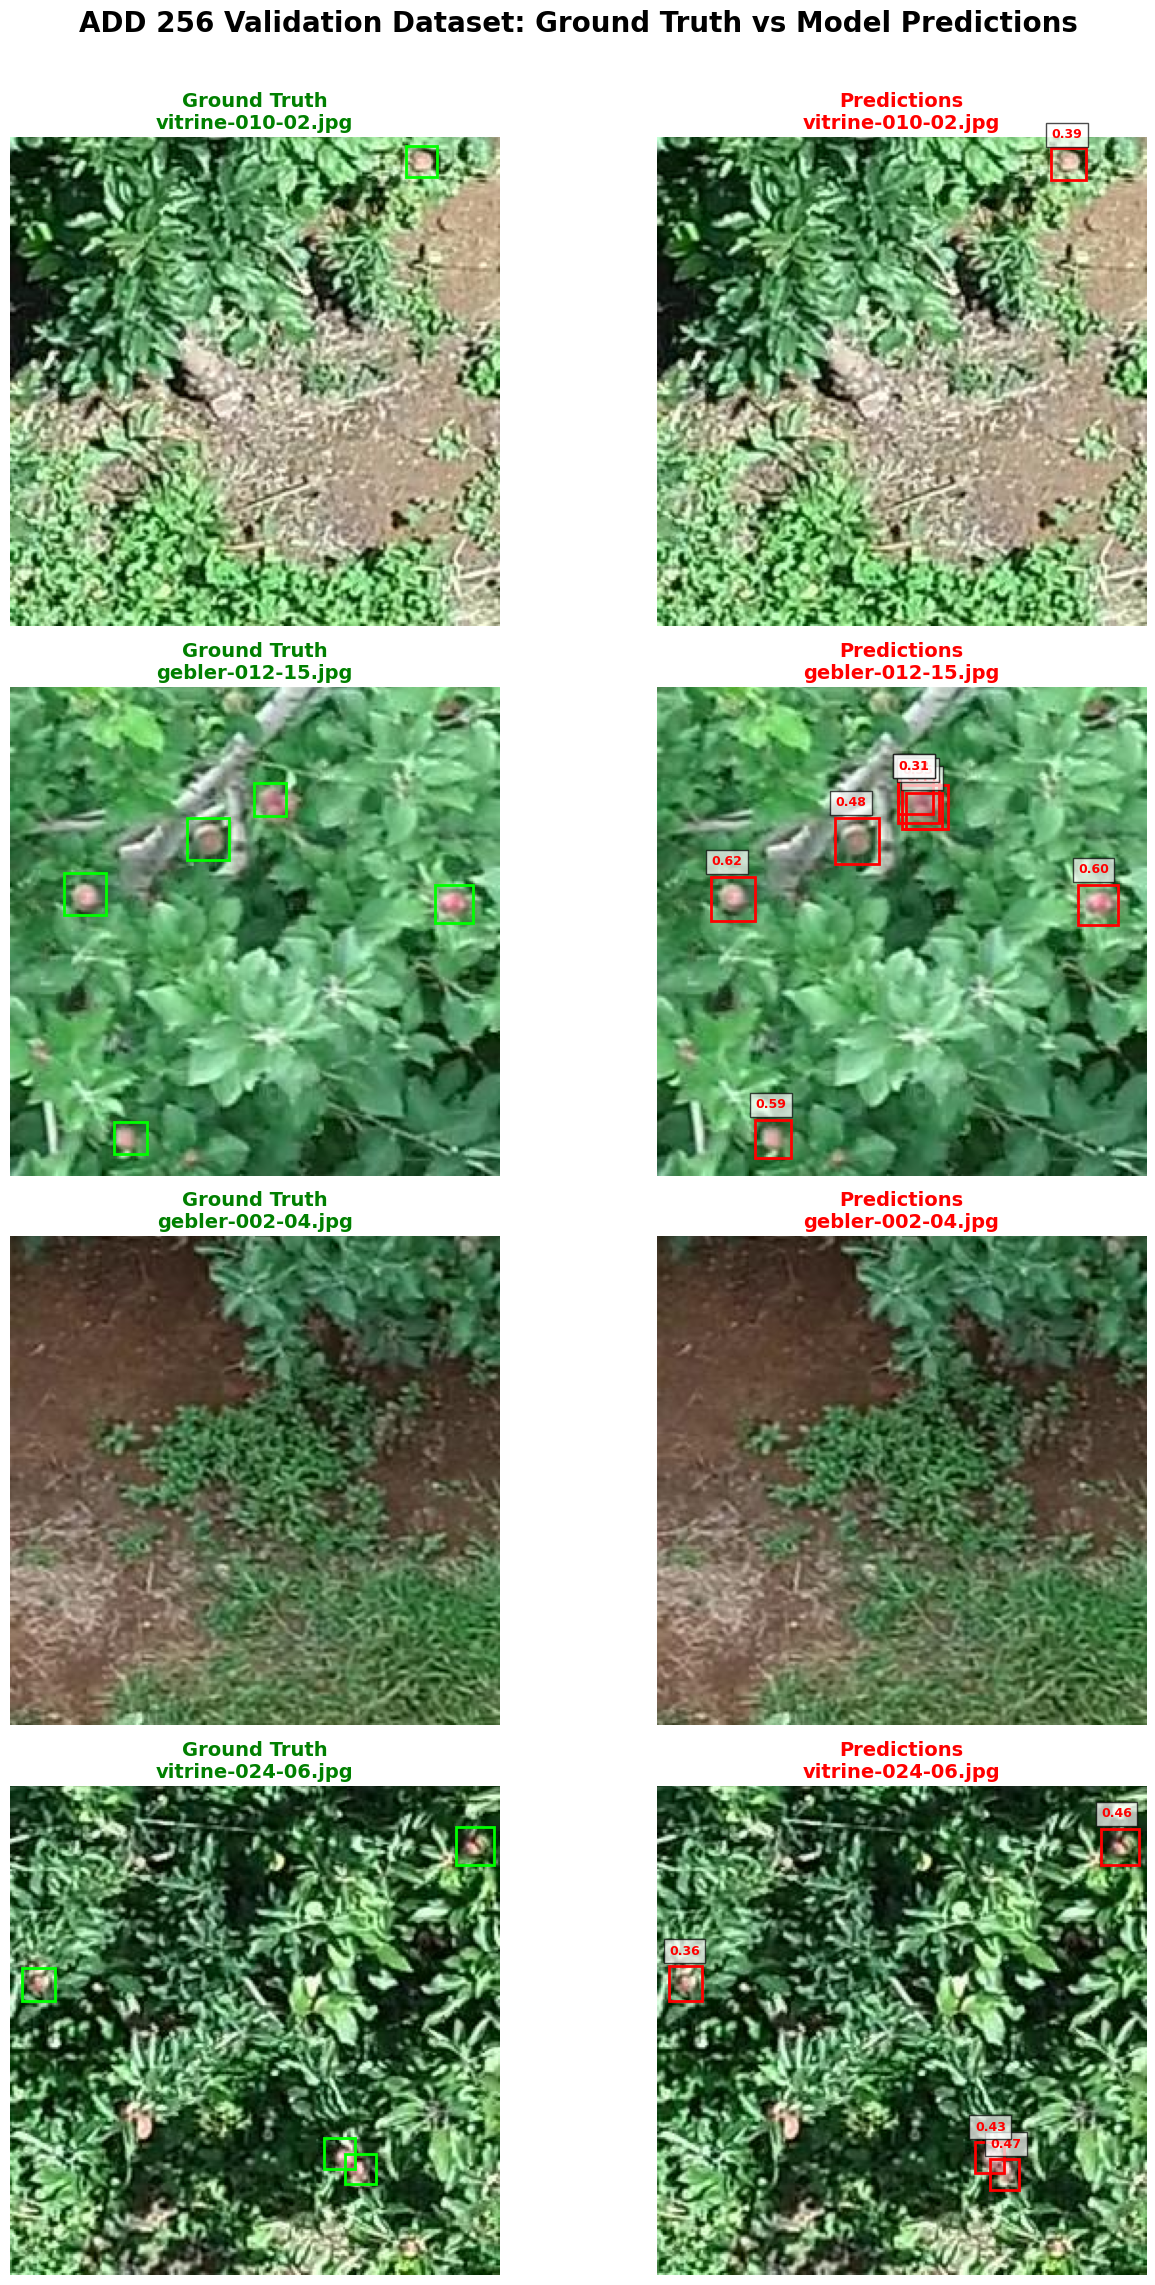


✓ Saved visualization: /content/drive/My Drive/YOLO_ADD256_Finetuning/Visualizations/YOLOv11_ADD256_val_predictions_vs_gt.png


In [ ]:
# ==========================================================================
# CELL 11: VISUALIZE MODEL PREDICTIONS vs GROUND TRUTH
# ==========================================================================
"""
Visualize model predictions compared to ground truth:
- Left plot: Ground truth bounding boxes (lime green)
- Right plot: Model predicted boxes (red) with confidence scores
For 4 random validation images.
"""

import cv2
import matplotlib.pyplot as plt
from pathlib import Path
import random
from matplotlib.patches import Rectangle
from ultralytics import YOLO

print("="*80)
print("VISUALIZING MODEL PREDICTIONS VS GROUND TRUTH")
print("="*80)

# Paths
dataset_processed_dir = Path('/content/drive/My Drive/YOLO_ADD256_Finetuning/ADD256_YOLO_Format')
models_dir = Path('/content/drive/My Drive/YOLO_ADD256_Finetuning/Models')
val_images_dir = dataset_processed_dir / 'images' / 'val'
val_labels_dir = dataset_processed_dir / 'labels' / 'val'
visualizations_dir = Path('/content/drive/My Drive/YOLO_ADD256_Finetuning/Visualizations')

# Load best model
best_model_path = models_dir / 'YOLOv11_ADD256_best_finetuned.pt'
if best_model_path.exists():
    model = YOLO(str(best_model_path))
    print(f"✓ Loaded model: {best_model_path.name}")
else:
    last_model_path = models_dir / 'YOLOv11_ADD256_last_finetuned.pt'
    if last_model_path.exists():
        model = YOLO(str(last_model_path))
        print(f"✓ Loaded model: {last_model_path.name}")
    else:
        raise Exception("No fine-tuned model found!")

# Get 4 random validation images
all_val_images = sorted(list(val_images_dir.glob('*.jpg')))
random.seed(42)
sample_val_images = random.sample(all_val_images, min(4, len(all_val_images)))

print("Selected 4 random validation images:")
for im in sample_val_images:
    print(f" - {im.name}")

# Prepare plot: 2 columns (GT, prediction), 4 rows
fig, axes = plt.subplots(4, 2, figsize=(14, 24))
fig.suptitle('ADD 256 Validation Dataset: Ground Truth vs Model Predictions', fontsize=20, fontweight='bold')

for i, img_path in enumerate(sample_val_images):
    # Load image
    img = cv2.imread(str(img_path))
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_height, img_width = img_rgb.shape[:2]

    # LEFT: Ground Truth
    ax_gt = axes[i, 0]
    ax_gt.imshow(img_rgb)
    ax_gt.set_title(f"Ground Truth\n{img_path.name}", fontsize=14, color='green', fontweight='bold')
    ax_gt.axis('off')

    # Load ground truth labels
    label_file = val_labels_dir / f"{img_path.stem}.txt"
    if label_file.exists():
        with open(label_file, 'r') as f:
            for line in f:
                parts = line.strip().split()
                if len(parts) >= 5:
                    cx_norm, cy_norm, w_norm, h_norm = map(float, parts[1:5])
                    x_min = int((cx_norm - w_norm/2) * img_width)
                    y_min = int((cy_norm - h_norm/2) * img_height)
                    box_width = int(w_norm * img_width)
                    box_height = int(h_norm * img_height)
                    rect = Rectangle((x_min, y_min), box_width, box_height, linewidth=2, edgecolor='lime', facecolor='none')
                    ax_gt.add_patch(rect)

    # RIGHT: Model Predictions
    ax_pred = axes[i, 1]
    ax_pred.imshow(img_rgb)
    ax_pred.set_title(f"Predictions\n{img_path.name}", fontsize=14, color='red', fontweight='bold')
    ax_pred.axis('off')

    # Run model inference
    results = model.predict(source=str(img_path), conf=0.3, verbose=False)
    if results and len(results) > 0:
        preds = results[0].boxes
        if preds is not None:
            for pred in preds:
                x1, y1, x2, y2 = map(int, pred.xyxy[0].cpu().numpy())
                score = float(pred.conf[0].cpu().numpy())
                rect = Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor='red', facecolor='none')
                ax_pred.add_patch(rect)
                ax_pred.text(x1, max(y1 - 6, 0), f"{score:.2f}", color='red', fontsize=9, weight='bold',
                             bbox=dict(facecolor='white', alpha=0.7))

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
output_path = visualizations_dir / 'YOLOv11_ADD256_val_predictions_vs_gt.png'
plt.savefig(output_path, dpi=150, bbox_inches='tight')
plt.show()
print(f"\n✓ Saved visualization: {output_path}")